In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
file_dir = "results/joint_meas/"

d_list = [4,6,8,10,12] # list of code distance
bandwidth =  8
Nrep = 1364 # No. of repetitions for saving separate files

for i_d, d in enumerate(d_list):
    Nrep_saved = 0
    for i_rep in range(Nrep):
        fname = f"d_{d}_bw_{bandwidth}_r_{i_rep}.npz"
        if os.path.isfile(file_dir +fname):
            Nrep_saved += 1

            f1 = np.load(file_dir + fname)
            gen_coh_ratio_list = f1['arr_0'] 
            if i_rep ==0 and i_d == 0:
                logical_err_rate = np.zeros((len(d_list),len(gen_coh_ratio_list)))

            logical_err_rate[i_d, :] += f1['arr_1'] 
    print(f"{d}, {Nrep_saved}")
    logical_err_rate[i_d, :] /= Nrep_saved
print(logical_err_rate)

4, 364
6, 364
8, 364
10, 364
12, 364
[[2.74725275e-07 3.02197802e-06 5.21978022e-05 7.35989011e-04
  9.16456044e-03 8.25324176e-02 3.38655495e-01 4.96198352e-01]
 [0.00000000e+00 0.00000000e+00 1.37362637e-06 1.83516484e-04
  9.62857143e-03 1.74544780e-01 4.84878846e-01 4.99702747e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.74175824e-05
  1.20760989e-02 3.06491484e-01 4.99866758e-01 4.99952198e-01]
 [0.00000000e+00 0.00000000e+00 1.09890110e-06 1.11428571e-03
  1.79100000e-01 4.99685165e-01 5.00292308e-01 5.00003571e-01]
 [0.00000000e+00 0.00000000e+00 5.49450549e-07 2.39697802e-03
  3.47058516e-01 5.00221429e-01 4.99765934e-01 5.00310165e-01]]


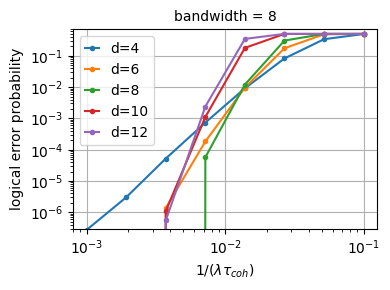

In [43]:
plt.figure(figsize=(4,3))
for i_d, d in enumerate(d_list):
    plt.plot(gen_coh_ratio_list,logical_err_rate[i_d,:],".-",label=f"d={d}")
plt.legend(handlelength=1)
plt.title(f"bandwidth = {bandwidth}", fontsize=10)
plt.ylim(3e-7,7e-1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Avg. ebit gen. time/qubit coherence time")
plt.xlabel(r"$1/(\lambda \tau_{coh})$")
plt.ylabel("logical error probability")
plt.grid()
plt.tight_layout()
fig_dir = "figures/"
plt.savefig(fig_dir + f"d_sweep_bw_{bandwidth}.pdf")
plt.show()

## Bandwidth

In [38]:
file_dir = "results/joint_meas/"

d = 12 # list of code distance
bw_list =  [4,8]
Nrep = 364 # No. of repetitions for saving separate files

for i_b, bandwidth in enumerate(bw_list):
    Nrep_saved = 0 
    for i_rep in range(Nrep):
        fname = f"d_{d}_bw_{bandwidth}_r_{i_rep}.npz"
        if os.path.isfile(file_dir +fname):
            Nrep_saved += 1
            f1 = np.load(file_dir + fname)
            gen_coh_ratio_list = f1['arr_0'] 
            if i_rep ==0 and i_b == 0:
                logical_err_rate = np.zeros((len(bw_list),len(gen_coh_ratio_list)))

            logical_err_rate[i_b, :] += f1['arr_1'] 
    print(f"{bandwidth}, {Nrep_saved}")
    logical_err_rate[i_b, :] /= Nrep_saved
# print(logical_err_rate)

4, 364
8, 201


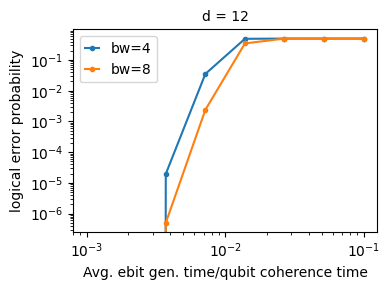

In [39]:
plt.figure(figsize=(4,3))
for i_b, bw in enumerate(bw_list):
    plt.plot(gen_coh_ratio_list,logical_err_rate[i_b,:],".-",label=f"bw={bw}")
plt.legend(handlelength=1)
plt.title(f"d = {d}", fontsize=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Avg. ebit gen. time/qubit coherence time")
# plt.xlabel(r"$1/(\lambda \tau_{coh})$")
plt.ylabel("logical error probability")
plt.tight_layout()
plt.show()